In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
from matplotlib import rc

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기

In [2]:
area = pd.read_csv('/Volumes/GoogleDrive/공유 드라이브/빅분기C조/ju_notes/data/#1. 공공자전거_대여소_정보/area_2019.csv', encoding = 'utf-8')
area_new = pd.read_csv('/Volumes/GoogleDrive/공유 드라이브/빅분기C조/ju_notes/data/#1. 공공자전거_대여소_정보/area_2020_2021.csv', encoding = 'utf-8')

In [3]:
area

,Unnamed: 0,location_num,location_name,district,address,y,x,install_date,LCD,QR,type
0,385,3543.0,세종대학교(학술정보원),광진구,서울특별시 광진구 능동로 209 세종대학교,37.551373,127.074440,2019-12-16,15,0,LCD
1,68,465.0,삼청공원 앞,종로구,서울특별시 종로구 삼청동 25-32,37.587605,126.983597,2019-11-20,5,0,LCD
2,451,664.0,서울시립대 대학본부,동대문구,동대문구 서울시립대로 163 서울시립대학교,37.584129,127.057938,2019-11-20,10,0,LCD
3,1683,2185.0,대학동 고시촌,관악구,서울특별시 관악구 신림로 97 밀라트,37.470467,126.938652,2019-09-26,10,0,LCD
4,67,464.0,삼청동 골목,종로구,종로구 팔판길 46,37.584190,126.981697,2019-08-16,10,0,LCD
...,...,...,...,...,...,...,...,...,...,...,...
1480,989,106.0,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912827,2015-09-06,10,0,LCD
1481,990,107.0,신한은행 서교동금융센터점 앞,마포구,서울특별시 마포구 월드컵북로 35,37.557510,126.918503,2015-09-06,5,0,LCD
1482,991,108.0,서교동 사거리,마포구,서울특별시 마포구 양화로 93,37.552746,126.918617,2015-09-06,10,0,LCD
1483,380,588.0,뚝섬 유원지역,광진구,서울특별시 광진구 능동로 10,37.532688,127.067497,NaN,0,20,QR


# 2. 대여소/신규대여소

In [4]:
area['district'].unique() #총 25개 자치구

array(['광진구', '종로구', '동대문구', '관악구', '마포구', '구로구', '은평구', '성북구', '노원구',
       '동작구', '서초구', '양천구', '금천구', '강남구', '중구', '용산구', '강북구', '도봉구',
       '강서구', '영등포구', '송파구', '서대문구', '강동구', '중랑구', '성동구'], dtype=object)

In [6]:
area_count_station = pd.DataFrame(area['district'].value_counts()) #자치구별 대여소 개수
area_count_station = area_count_station.reset_index()

<AxesSubplot:title={'center':'자치구별 대여소 수'}, xlabel='count', ylabel='district'>

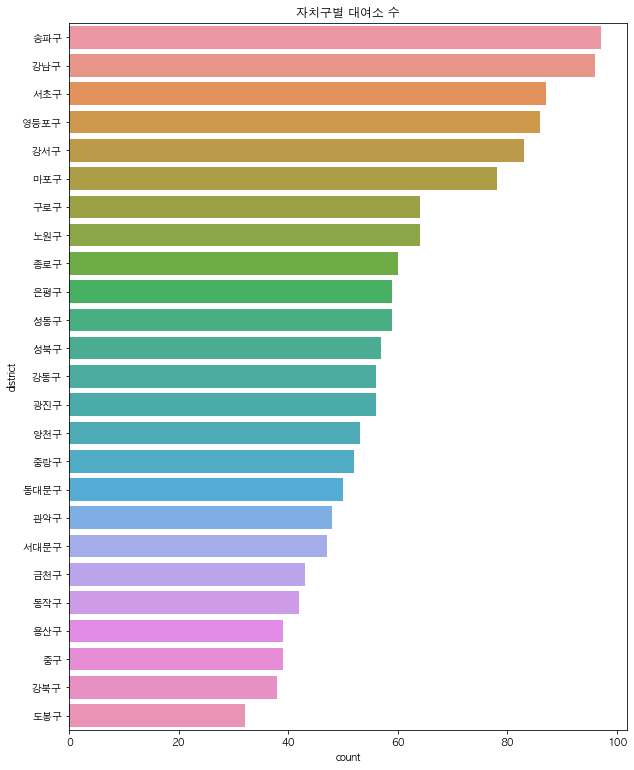

In [7]:
plt.figure(figsize=(10,13))
plt.title('자치구별 대여소 수')
sns.countplot(y=area['district'], order = ['송파구','강남구','서초구','영등포구','강서구','마포구', '구로구','노원구','종로구',
                                         '은평구', '성동구','성북구','강동구', '광진구', '양천구', '중랑구','동대문구',
                                           '관악구', '서대문구', '금천구', '동작구', '용산구','중구', '강북구','도봉구'])
                                         

In [8]:
area_new_count = pd.DataFrame(area_new['district'].value_counts())
area_new_count = area_new_count.reset_index()

<AxesSubplot:title={'center':'자치구별 2020, 2021년 신규 대여소 설치 순위'}, xlabel='count', ylabel='district'>

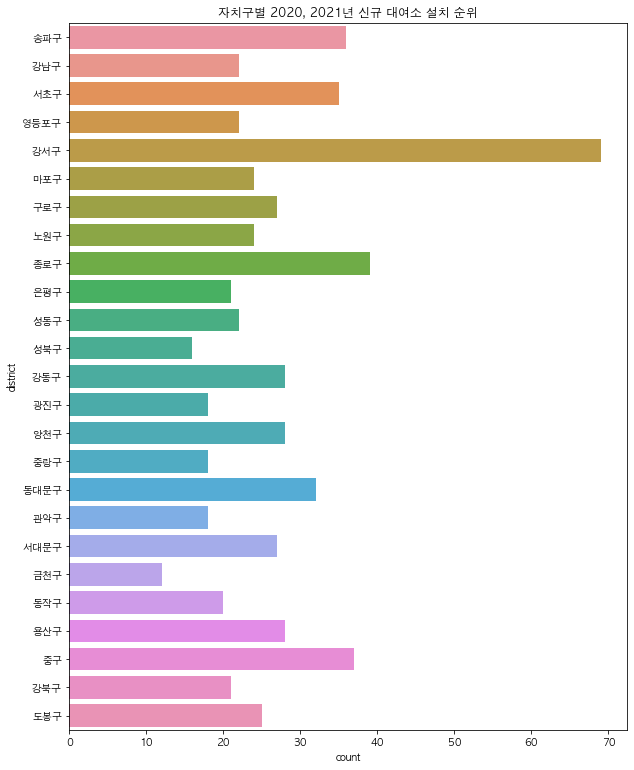

In [9]:
plt.figure(figsize=(10,13))
plt.title('자치구별 2020, 2021년 신규 대여소 설치 순위')
sns.countplot(y=area_new['district'], order = ['송파구','강남구','서초구','영등포구','강서구','마포구', '구로구','노원구','종로구',
                                         '은평구', '성동구','성북구','강동구', '광진구', '양천구', '중랑구','동대문구',
                                           '관악구', '서대문구', '금천구', '동작구', '용산구','중구', '강북구','도봉구'])

# 3. 구별 이용 건수

In [10]:
trip_area = pd.read_csv('/Volumes/GoogleDrive/공유 드라이브/빅분기C조/ju_notes/data/#4. 공공자전거_대여이력_정보/trip_area_2019.csv', encoding = 'cp949')

/Users/hyomin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
trip_area = trip_area.drop('Unnamed: 0', axis=1)
trip_area

,bike_no,rental_date,location_num,rental_loc_name,rental_rack,return_date,return_loc_no,return_loc_name,return_rack,rental_time,rental_distance,district,address,y,x,install_date,LCD,QR,type
0,SPB-10632,2019-01-01 00:00:44,1421.0,신내역 4번출구,3.0,2019-01-01 00:03:53,1420.0,신내어울공원 앞,13.0,2.0,580.0,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
1,SPB-15008,2019-01-01 00:16:31,1421.0,신내역 4번출구,18.0,2019-01-01 00:37:57,1608.0,공릉역 1번 출구 앞,6.0,21.0,3870.0,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
2,SPB-19554,2019-01-01 04:32:36,1421.0,신내역 4번출구,16.0,2019-01-01 04:50:54,1433.0,중화역 2번출구,7.0,17.0,3430.0,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
3,SPB-16956,2019-01-01 12:03:28,1421.0,신내역 4번출구,13.0,2019-01-01 12:15:58,1421.0,신내역 4번출구,1.0,12.0,490.0,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
4,SPB-16956,2019-01-01 16:58:42,1421.0,신내역 4번출구,1.0,2019-01-01 17:06:25,1438.0,홈플러스 신내점 앞,12.0,7.0,1070.0,중랑구,서울특별시 중랑구 신내로 지하 232,37.612461,127.103378,2017-04-26,20.0,0.0,LCD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18521938,SPB-24199,2019-12-30 23:34:43,3543.0,세종대학교(학술정보원),5.0,2019-12-30 23:39:29,3518.0,군자역 7번출구뒤,4.0,4.0,1210.0,광진구,서울특별시 광진구 능동로 209 세종대학교,37.551373,127.074440,2019-12-16,15.0,0.0,LCD
18521939,SPB-16995,2019-12-31 15:28:15,3543.0,세종대학교(학술정보원),13.0,2019-12-31 15:53:38,3543.0,세종대학교(학술정보원),13.0,25.0,2750.0,광진구,서울특별시 광진구 능동로 209 세종대학교,37.551373,127.074440,2019-12-16,15.0,0.0,LCD
18521940,SPB-16995,2019-12-31 16:46:34,3543.0,세종대학교(학술정보원),13.0,2019-12-31 16:59:00,501.0,광진구의회 앞,10.0,12.0,1900.0,광진구,서울특별시 광진구 능동로 209 세종대학교,37.551373,127.074440,2019-12-16,15.0,0.0,LCD
18521941,SPB-13394,2019-12-31 17:06:37,3543.0,세종대학교(학술정보원),11.0,2019-12-31 17:18:00,3520.0,광진경찰서,7.0,10.0,1590.0,광진구,서울특별시 광진구 능동로 209 세종대학교,37.551373,127.074440,2019-12-16,15.0,0.0,LCD


In [12]:
# 자치구별 2019년 총 이용건수
area_count_usage = pd.DataFrame(trip_area['district'].value_counts())
area_count_usage = area_count_usage.reset_index()

<AxesSubplot:title={'center':'자치구별 2019년 총 이용건수'}, xlabel='count', ylabel='district'>

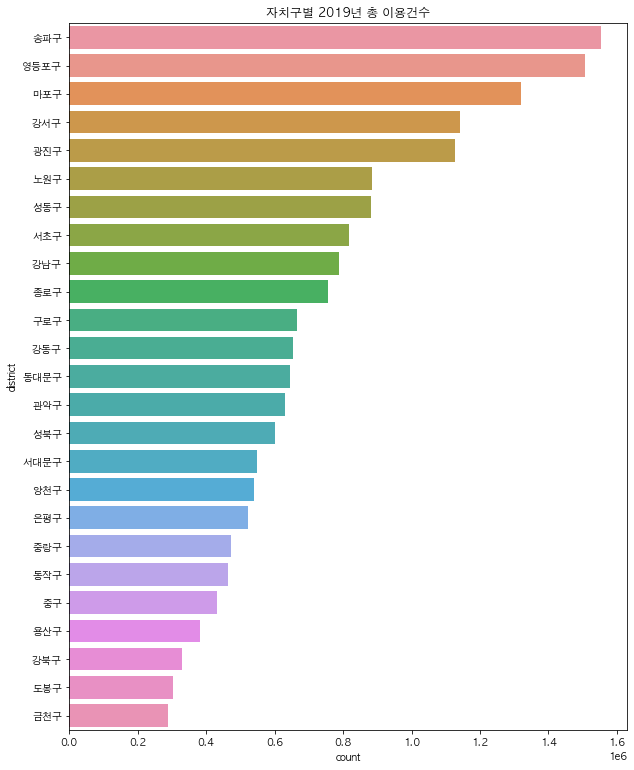

In [13]:
plt.figure(figsize=(10,13))
plt.title('자치구별 2019년 총 이용건수')
sns.countplot(y=trip_area['district'], order = ['송파구','영등포구','마포구','강서구', '광진구','노원구', '성동구','서초구'
                                                ,'강남구','종로구', '구로구','강동구', '동대문구', '관악구','성북구', '서대문구',
                                                '양천구', '은평구','중랑구', '동작구', '중구', '용산구', '강북구','도봉구','금천구'])

# 4. 이용건수 + 대여소 + 신규대여소

In [16]:
area_merge0 = pd.merge(area_count_station, area_new_count, how='outer', on='index')

,index,district_x,district_y
0,송파구,97,36
1,강남구,96,22
2,서초구,87,35
3,영등포구,86,22
4,강서구,83,69
5,마포구,78,24
6,노원구,64,24
7,구로구,64,27
8,종로구,60,39
9,은평구,59,21


In [36]:
# area_merge = pd.merge(area_count_usage,area_merge0, how='outer', on='index')
# area_merge = area_merge.reset_index()
# area_merge = area_merge.rename(columns={'index':'district', 'district':'usage', 'district_x':'station', 
#                                         'district_y':'new_station'})
# area_merge = area_merge.drop('level_0', axis=1)
# area_merge = area_merge.sort_values(by='station', ascending=True)
# area_merge['station_ratio'] = (area_merge['station']/area_merge['usage'])*1000000
area_merge

,district,usage,station,new_station,station_ratio
23,도봉구,302758,32,25,105.694978
22,강북구,329248,38,21,115.414520
21,용산구,382169,39,28,102.049093
20,중구,432697,39,37,90.132356
19,동작구,462528,42,20,90.805313
24,금천구,288215,43,12,149.194178
15,서대문구,547447,47,27,85.853060
13,관악구,631105,48,18,76.057074
12,동대문구,643855,50,32,77.657236
18,중랑구,474051,52,18,109.692839


In [27]:
area_merge2 = area_merge.sort_values(by='usage', ascending=False)
area_merge2

,district,usage,station,new_station,station_ratio
0,송파구,1552372,97,36,62.485023
1,영등포구,1506710,86,22,57.078004
2,마포구,1319223,78,24,59.125713
3,강서구,1141570,83,69,72.706886
4,광진구,1126491,56,18,49.711893
5,노원구,884758,64,24,72.336164
6,성동구,880961,59,22,66.972318
7,서초구,816307,87,35,106.577550
8,강남구,787704,96,22,121.873191
9,종로구,754652,60,39,79.506846


In [29]:
area_merge3 = area_merge.sort_values(by='station_ratio', ascending=True)
area_merge3

,district,usage,station,new_station,station_ratio
4,광진구,1126491,56,18,49.711893
1,영등포구,1506710,86,22,57.078004
2,마포구,1319223,78,24,59.125713
0,송파구,1552372,97,36,62.485023
6,성동구,880961,59,22,66.972318
5,노원구,884758,64,24,72.336164
3,강서구,1141570,83,69,72.706886
13,관악구,631105,48,18,76.057074
12,동대문구,643855,50,32,77.657236
9,종로구,754652,60,39,79.506846


# 5. 신규 대여소 설치 기준 분석
### 0) 히트맵
### 1) 이용건수 대비 대여소 비율이 적은 곳: 이용건수에 비해 대여소 수가 적은 곳에 신규 대여소를 더 많이 설치하는가?
### 2) 이용건수가 많은 곳
### 3) 대여소 수가 적은 곳

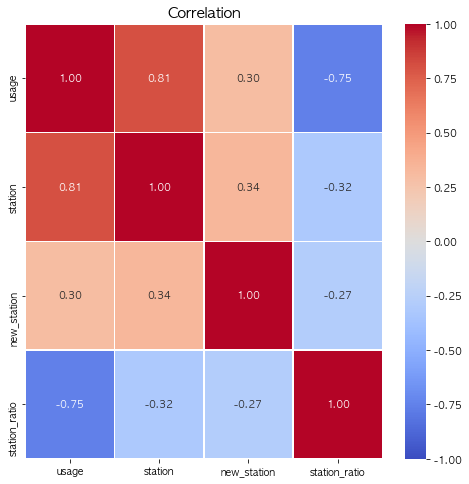

In [28]:
# 0) 히트맵

plt.figure(figsize=(8,8))
plt.title("Correlation", fontsize=15)
sns.heatmap(data = area_merge.corr(),
            annot=True,
            fmt = '.2f', linewidths=.5, cmap='coolwarm',
           vmin = -1, vmax = 1, center = 0)
plt.show()

<AxesSubplot:title={'center':'이용건수 대비 대여소 비율이 적은 곳'}, xlabel='district', ylabel='station_ratio'>

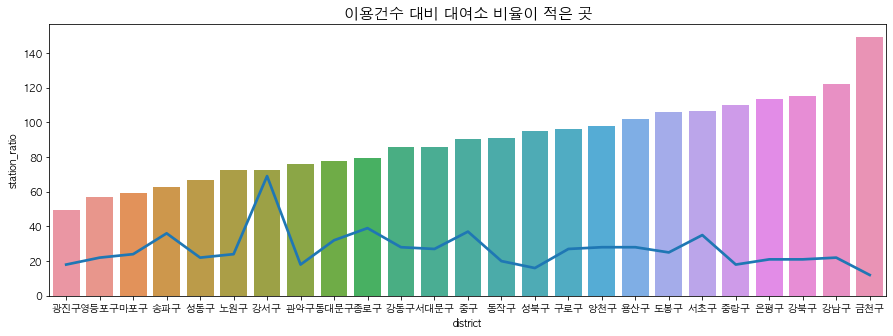

In [33]:
# 1) 이용건수 대비 대여소 비율이 적은 곳: 이용건수에 비해 대여소 수가 적은 곳에 신규 대여소를 더 많이 설치하는가?

plt.figure(figsize=(15, 5))
plt.title("이용건수 대비 대여소 비율이 적은 곳", fontsize=15)
sns.pointplot(data=area_merge3, x='district', y='new_station')
sns.barplot(data=area_merge3, x='district', y='station_ratio')

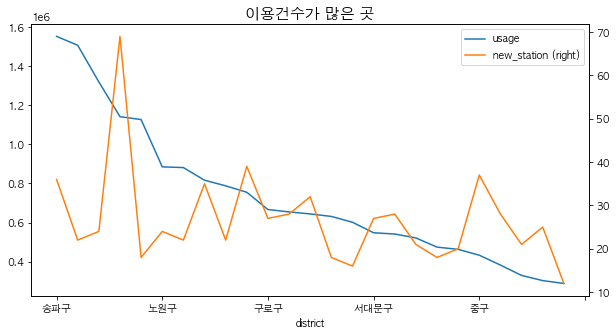

In [34]:
# 2) 이용건수가 많은 곳

ax = area_merge2.plot('district','usage', figsize=(10,5))
plt.title("이용건수가 많은 곳", fontsize=15)
area_merge2.plot('district','new_station',secondary_y=True, ax=ax)
plt.show()

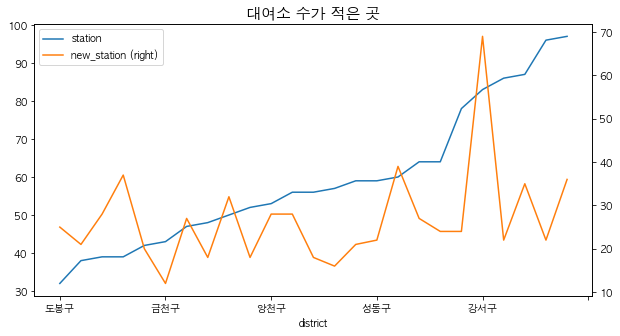

In [37]:
# 3) 대여소 수가 적은 곳

ax = area_merge.plot('district','station', figsize=(10,5))
plt.title("대여소 수가 적은 곳", fontsize=15)
area_merge.plot('district','new_station',secondary_y=True, ax=ax)
plt.show()

# 6. 구별 이용시간/이용거리 분석(1회 대여 시)

<AxesSubplot:xlabel='rental_time', ylabel='district'>

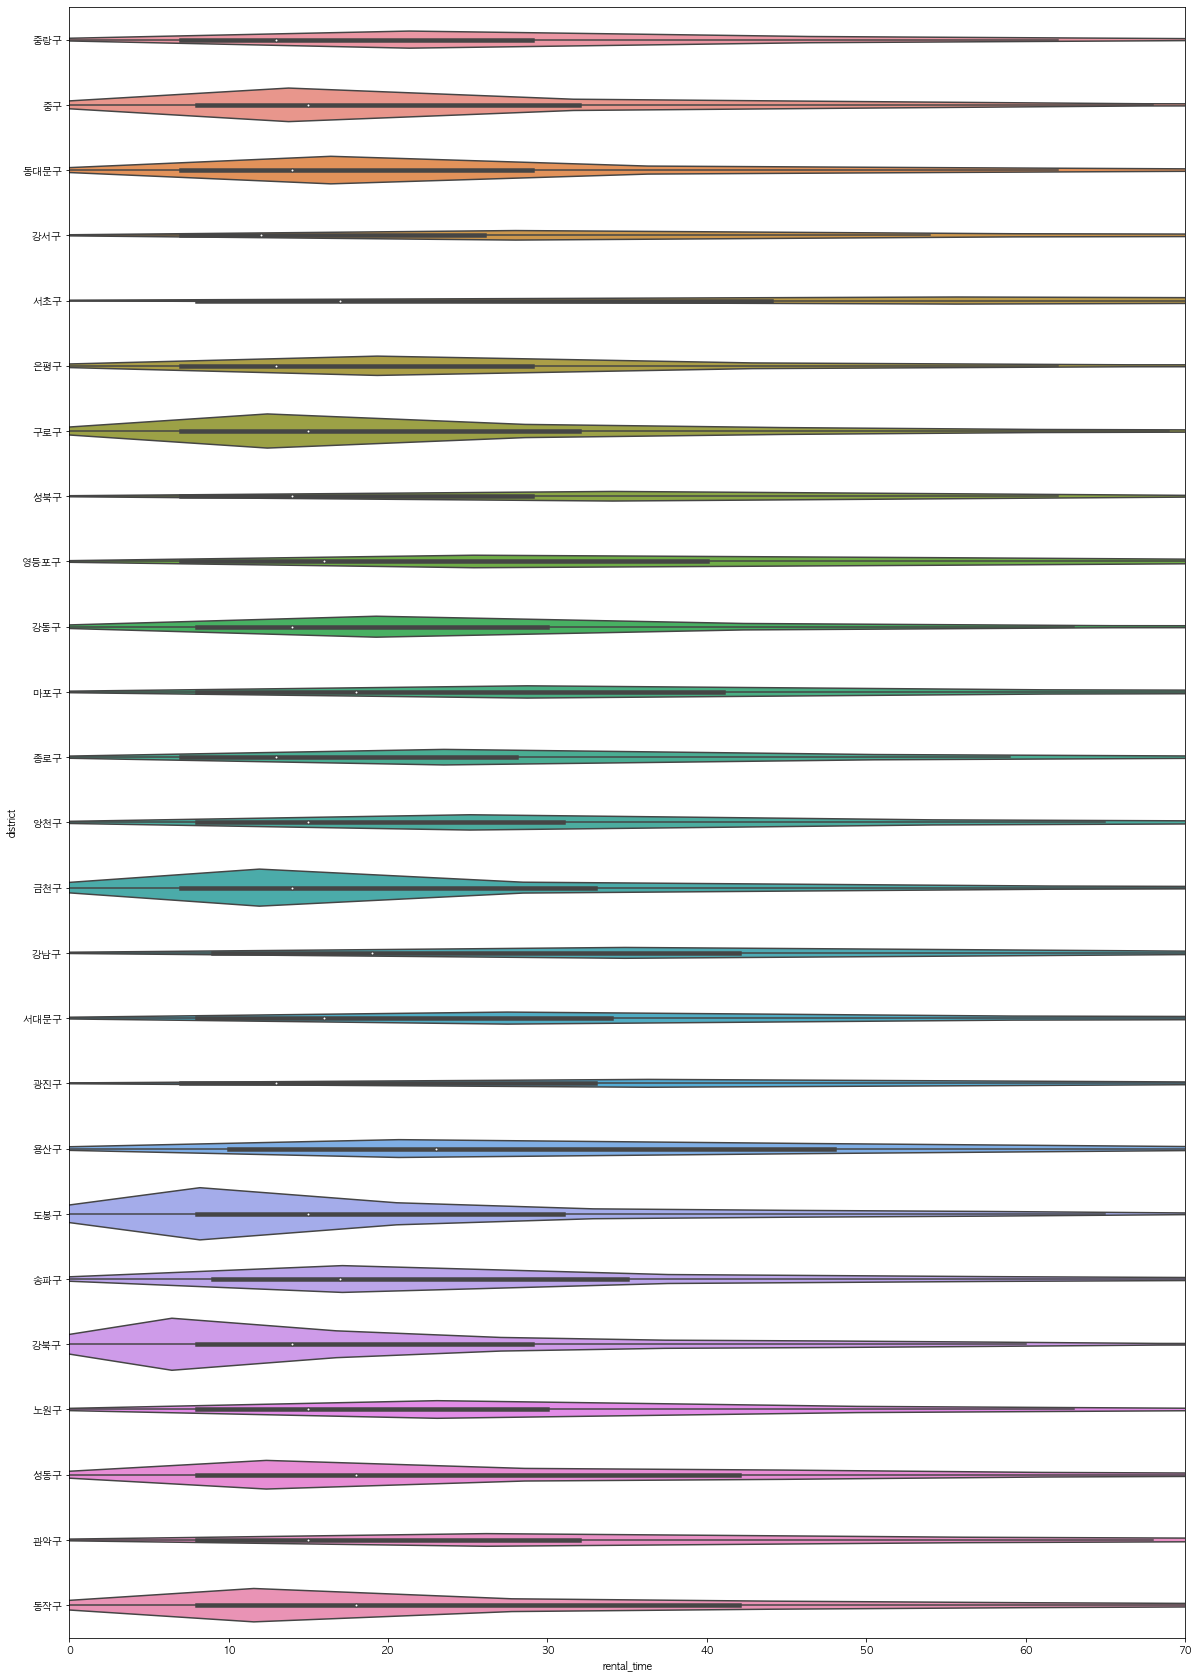

In [131]:
# 구별 이용시간 (1회 대여 시)

plt.figure(figsize=(20,30))
plt.xlim([0, 70]) 
sns.violinplot(x = 'rental_time', y = 'district', data = trip_area)

<AxesSubplot:xlabel='rental_distance', ylabel='district'>

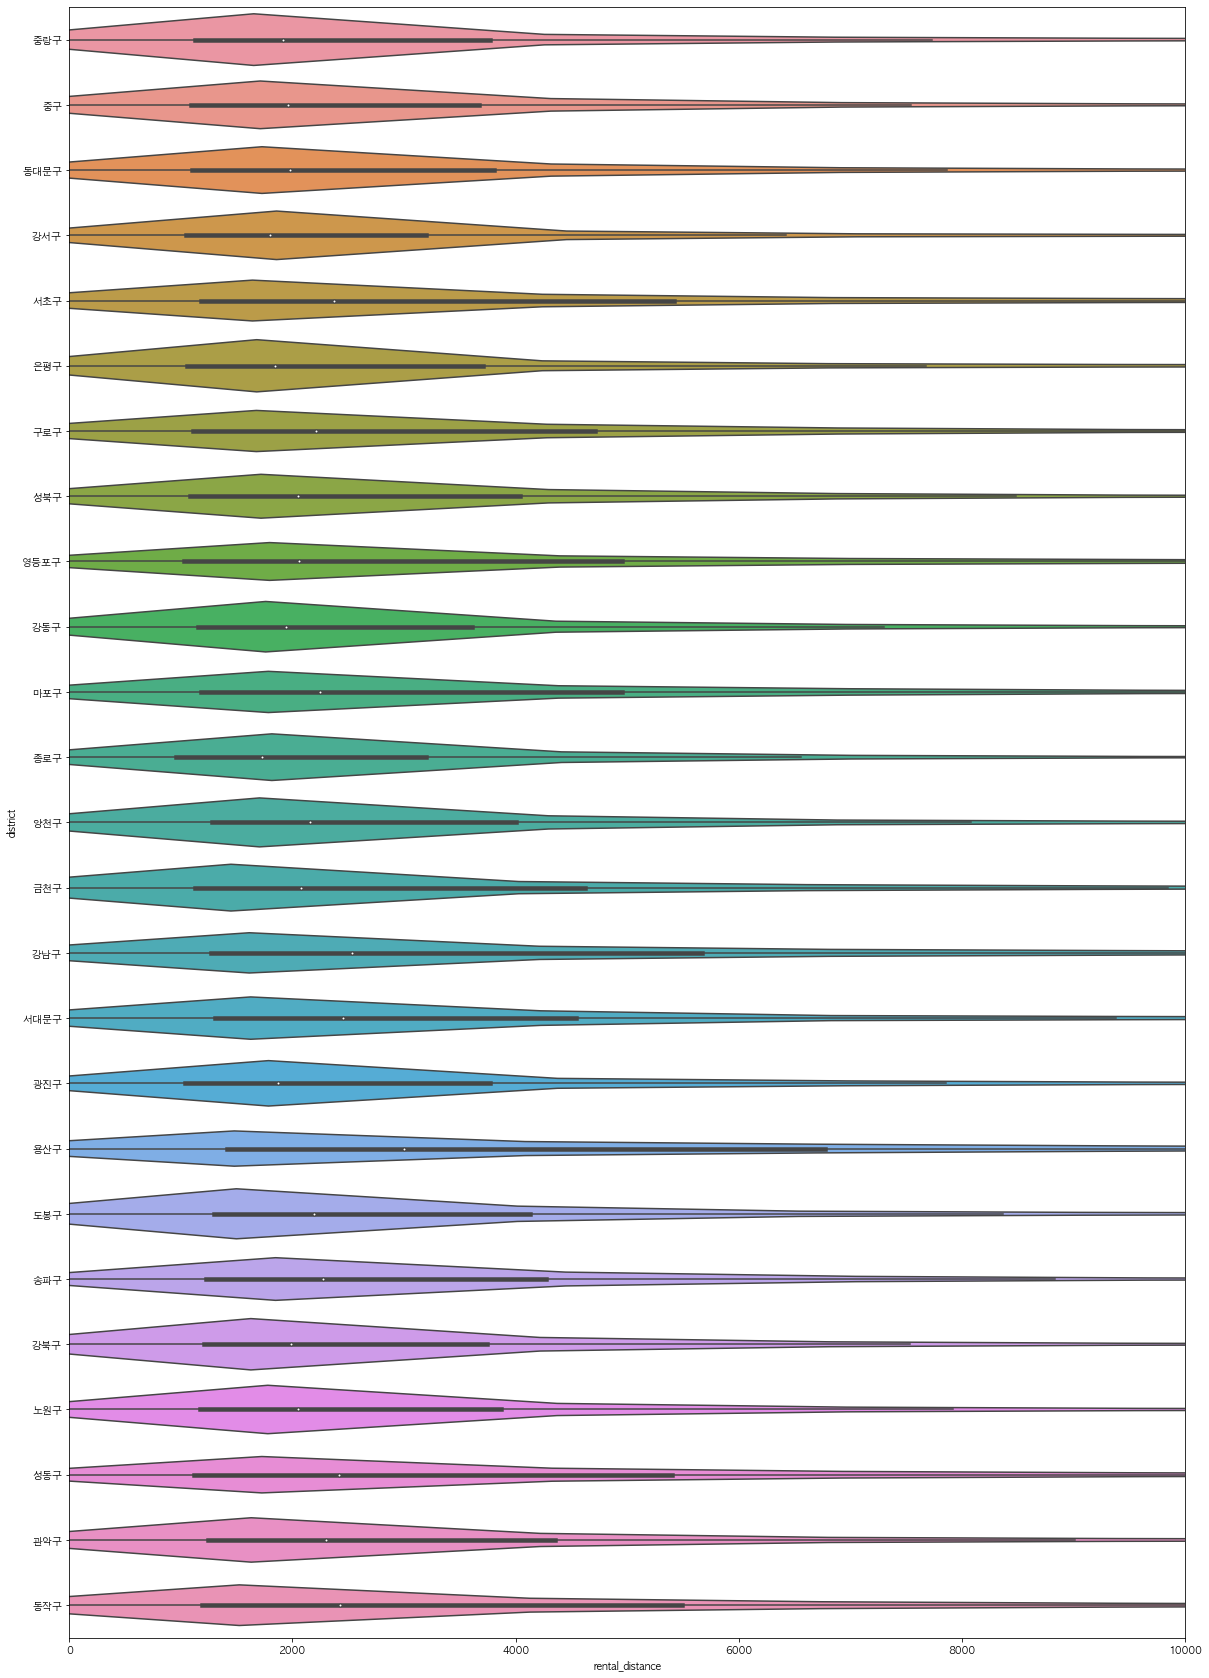

In [39]:
# 구별 이용거리 (1회 대여 시)

plt.figure(figsize=(20,30))
plt.xlim([0,10000]) 
sns.violinplot(x = 'rental_distance', y = 'district', data = trip_area)

In [40]:
# 자치구별 평균 이용시간 (1회 이용 시)

trip_grouped = trip_area.groupby('district')

In [41]:
trip_grouped_time = pd.DataFrame(trip_grouped['rental_time'].mean())
trip_grouped_time

,rental_time
district,
강남구,29.922646
강동구,24.346371
강북구,23.005661
강서구,21.838951
관악구,25.333816
광진구,24.316066
구로구,24.900484
금천구,25.100845
노원구,23.421761


In [45]:
# 자치구별 평균 이동거리 (1회 이용 시)

trip_grouped_dist = pd.DataFrame(trip_grouped['rental_distance'].mean())
trip_grouped_dist

,rental_distance
district,
강남구,4617.164081
강동구,3364.651252
강북구,3376.076821
강서구,3248.620566
관악구,4082.812871
광진구,3487.991650
구로구,4015.084362
금천구,4115.974155
노원구,3556.515895


In [51]:
trip_merge0 = pd.merge(trip_grouped_time, trip_grouped_dist, how='outer', on='district')
trip_merge0

,rental_time,rental_distance
district,,
강남구,29.922646,4617.164081
강동구,24.346371,3364.651252
강북구,23.005661,3376.076821
강서구,21.838951,3248.620566
관악구,25.333816,4082.812871
광진구,24.316066,3487.991650
구로구,24.900484,4015.084362
금천구,25.100845,4115.974155
노원구,23.421761,3556.515895


In [53]:
trip_merge = trip_merge0.reset_index()
# trip_merge = trip_merge.sort_values(by='station', ascending=True)
trip_merge

,district,rental_time,rental_distance
0,강남구,29.922646,4617.164081
1,강동구,24.346371,3364.651252
2,강북구,23.005661,3376.076821
3,강서구,21.838951,3248.620566
4,관악구,25.333816,4082.812871
5,광진구,24.316066,3487.991650
6,구로구,24.900484,4015.084362
7,금천구,25.100845,4115.974155
8,노원구,23.421761,3556.515895
9,도봉구,24.491984,3815.184894


/Users/hyomin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


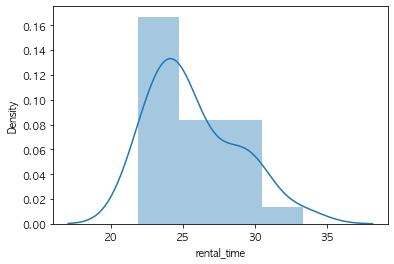

In [54]:
sns.distplot(trip_merge['rental_time'])

plt.show()


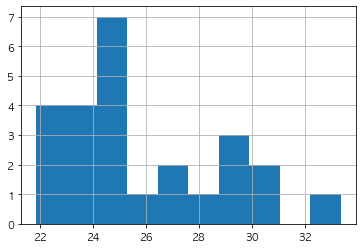

In [43]:
trip_merge['rental_time'].hist();

<AxesSubplot:>

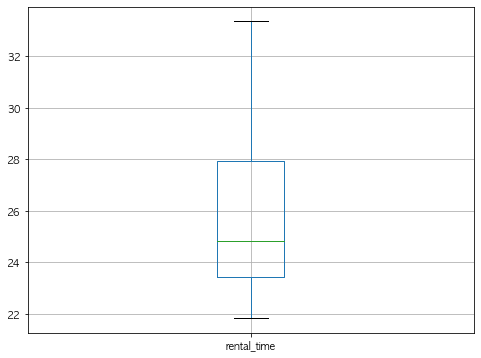

In [55]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
trip_merge.boxplot(column='rental_time', ax=ax)

/Users/hyomin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


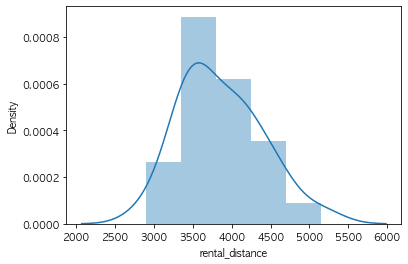

In [56]:
sns.distplot(trip_merge['rental_distance'])

plt.show()


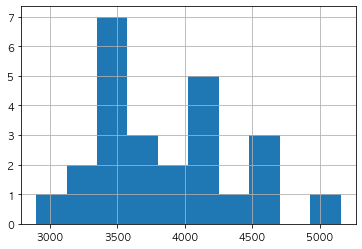

In [57]:
trip_merge['rental_distance'].hist();

<AxesSubplot:>

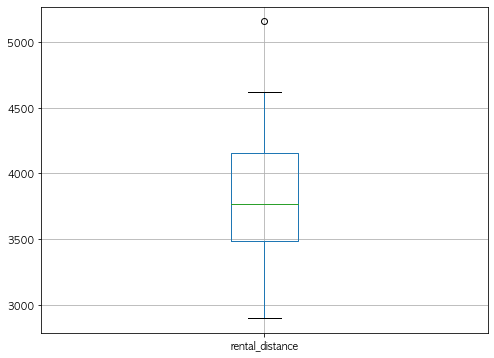

In [58]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
trip_merge.boxplot(column='rental_distance', ax=ax)

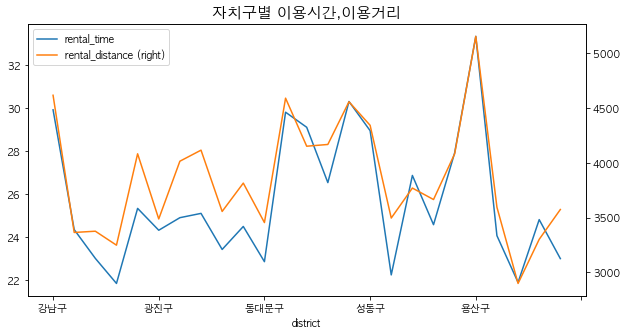

In [60]:
ax = trip_merge.plot('district','rental_time', figsize=(10,5))
plt.title("자치구별 이용시간,이용거리", fontsize=15)
trip_merge.plot('district','rental_distance',secondary_y=True, ax=ax)
plt.show()

In [65]:
# 이용건수가 많은 지역일수록 시간/거리도 증가하는가?
usage_time_merge = pd.merge(area_merge2, trip_merge, how='outer', on='district')
usage_time_merge

,district,usage,station,new_station,station_ratio,rental_time,rental_distance
0,송파구,1552372,97,36,62.485023,26.867335,3770.014071
1,영등포구,1506710,86,22,57.078004,27.921049,4082.567740
2,마포구,1319223,78,24,59.125713,29.109071,4152.005571
3,강서구,1141570,83,69,72.706886,21.838951,3248.620566
4,광진구,1126491,56,18,49.711893,24.316066,3487.991650
5,노원구,884758,64,24,72.336164,23.421761,3556.515895
6,성동구,880961,59,22,66.972318,28.952427,4342.823294
7,서초구,816307,87,35,106.577550,30.309509,4557.726048
8,강남구,787704,96,22,121.873191,29.922646,4617.164081
9,종로구,754652,60,39,79.506846,21.886261,2899.212694


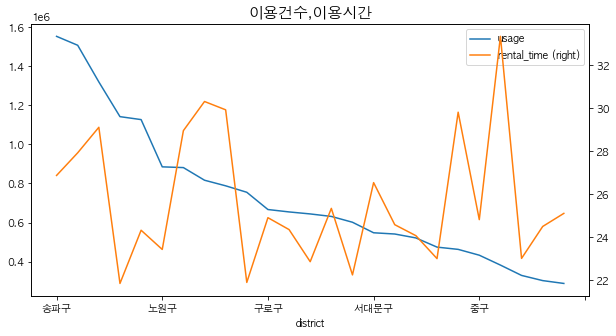

In [69]:
ax = usage_time_merge.plot('district','usage', figsize=(10,5))
plt.title("이용건수,이용시간", fontsize=15)
usage_time_merge.plot('district','rental_time',secondary_y=True, ax=ax)
plt.show()

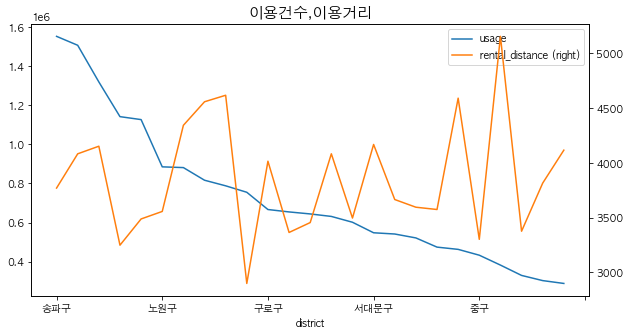

In [70]:
ax = usage_time_merge.plot('district','usage', figsize=(10,5))
plt.title("이용건수,이용거리", fontsize=15)
usage_time_merge.plot('district','rental_distance',secondary_y=True, ax=ax)
plt.show()

# 7. 구별 연령대 비율 분석

In [71]:
rental = pd.read_csv('/Volumes/GoogleDrive/공유 드라이브/빅분기C조/ju_notes/data/#5. 공공자전거_이용정보(시간대별)/ride_data_2019.csv', encoding = 'cp949')

/Users/hyomin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [72]:
rental_area = pd.merge(rental,area, how='outer',on='location_num')
rental_area['sex']=rental_area['sex'].apply(lambda x: 'M' if x=='m' else 'F' if x=='f' else x)
rental_area['age']=rental_area['age'].apply(lambda x: '10대' if x=='~10대' else '70대' if x=='70대~' else x)
rental_area

,Unnamed: 0_x,date,time,location_num,location_name_x,rental_code,sex,age,usage,calories,...,Unnamed: 0_y,location_name_y,district,address,y,x,install_date,LCD,QR,type
0,0,2019-01-01,0,458,458. 광화문역 5번출구,정기권,F,10대,1,41.96,...,64.0,광화문역 5번출구,종로구,종로구 세종로 1-68,37.569939,126.977539,2018-08-31,21.0,0.0,LCD
1,189,2019-01-01,0,458,458. 광화문역 5번출구,정기권,M,50대,1,52.89,...,64.0,광화문역 5번출구,종로구,종로구 세종로 1-68,37.569939,126.977539,2018-08-31,21.0,0.0,LCD
2,223,2019-01-01,0,458,458. 광화문역 5번출구,일일권,F,50대,1,53.54,...,64.0,광화문역 5번출구,종로구,종로구 세종로 1-68,37.569939,126.977539,2018-08-31,21.0,0.0,LCD
3,794,2019-01-01,2,458,458. 광화문역 5번출구,일일권,M,20대,2,237.06,...,64.0,광화문역 5번출구,종로구,종로구 세종로 1-68,37.569939,126.977539,2018-08-31,21.0,0.0,LCD
4,3371,2019-01-01,16,458,458. 광화문역 5번출구,정기권,M,30대,1,25.23,...,64.0,광화문역 5번출구,종로구,종로구 세종로 1-68,37.569939,126.977539,2018-08-31,21.0,0.0,LCD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14719880,14712243,2019-12-31,15,3543,3543. 세종대학교(학술정보원),정기권,NaN,30대,1,74.05,...,385.0,세종대학교(학술정보원),광진구,서울특별시 광진구 능동로 209 세종대학교,37.551373,127.074440,2019-12-16,15.0,0.0,LCD
14719881,14713261,2019-12-31,16,3543,3543. 세종대학교(학술정보원),정기권,NaN,30대,1,57.93,...,385.0,세종대학교(학술정보원),광진구,서울특별시 광진구 능동로 209 세종대학교,37.551373,127.074440,2019-12-16,15.0,0.0,LCD
14719882,14714867,2019-12-31,17,3543,3543. 세종대학교(학술정보원),정기권,M,20대,1,1841.70,...,385.0,세종대학교(학술정보원),광진구,서울특별시 광진구 능동로 209 세종대학교,37.551373,127.074440,2019-12-16,15.0,0.0,LCD
14719883,14715077,2019-12-31,17,3543,3543. 세종대학교(학술정보원),정기권,M,40대,1,48.48,...,385.0,세종대학교(학술정보원),광진구,서울특별시 광진구 능동로 209 세종대학교,37.551373,127.074440,2019-12-16,15.0,0.0,LCD


In [73]:
rental_area2 = rental_area[['district','rental_code','sex','age','usage']]
rental_area2

,district,rental_code,sex,age,usage
0,종로구,정기권,F,10대,1
1,종로구,정기권,M,50대,1
2,종로구,일일권,F,50대,1
3,종로구,일일권,M,20대,2
4,종로구,정기권,M,30대,1
...,...,...,...,...,...
14719880,광진구,정기권,NaN,30대,1
14719881,광진구,정기권,NaN,30대,1
14719882,광진구,정기권,M,20대,1
14719883,광진구,정기권,M,40대,1


In [98]:
# rental_area_age = pd.get_dummies(rental_area2["age"])
# rental_area_age['district'] = rental_area2['district']
# rental_area_age = rental_area_age.groupby(rental_area_age['district']).sum()
# rental_area_age['총합'] = rental_area_age['10대']+rental_area_age['20대']+rental_area_age['30대']+rental_area_age['40대']+rental_area_age['50대']+rental_area_age['60대']+rental_area_age['70대']

# rental_area_age['10대_비율'] = rental_area_age['10대']/rental_area_age['총합']*100
# rental_area_age['20대_비율'] = rental_area_age['20대']/rental_area_age['총합']*100
# rental_area_age['30대_비율'] = rental_area_age['30대']/rental_area_age['총합']*100
# rental_area_age['40대_비율'] = rental_area_age['40대']/rental_area_age['총합']*100
# rental_area_age['50대_비율'] = rental_area_age['50대']/rental_area_age['총합']*100
# rental_area_age['60대_비율'] = rental_area_age['60대']/rental_area_age['총합']*100
# rental_area_age['70대_비율'] = rental_area_age['70대']/rental_area_age['총합']*100

rental_area_age = rental_area_age.reset_index()
rental_area_age

,district,10대,20대,30대,40대,50대,60대,70대,총합,10대_비율,20대_비율,30대_비율,40대_비율,50대_비율,60대_비율,70대_비율
0,강남구,21961.0,256620.0,170530.0,115974.0,67361.0,14226.0,1954.0,648626.0,3.385772,39.563631,26.290960,17.879949,10.385183,2.193252,0.301252
1,강동구,27409.0,241141.0,121297.0,69551.0,44613.0,13243.0,2418.0,519672.0,5.274288,46.402539,23.341069,13.383634,8.584838,2.548338,0.465293
2,강북구,15676.0,135349.0,49495.0,36959.0,26331.0,5558.0,1964.0,271332.0,5.777424,49.883169,18.241490,13.621320,9.704347,2.048413,0.723836
3,강서구,49221.0,375511.0,210731.0,125615.0,64323.0,14904.0,2404.0,842709.0,5.840806,44.559985,25.006378,14.906095,7.632884,1.768582,0.285270
4,관악구,17765.0,233098.0,118945.0,60677.0,31025.0,8818.0,2390.0,472718.0,3.758054,49.310160,25.161936,12.835771,6.563110,1.865383,0.505587
5,광진구,52941.0,400802.0,160416.0,81711.0,48417.0,9771.0,2045.0,756103.0,7.001824,53.008915,21.216157,10.806861,6.403493,1.292284,0.270466
6,구로구,31238.0,228549.0,128211.0,83783.0,44022.0,10729.0,1662.0,528194.0,5.914115,43.269897,24.273468,15.862164,8.334438,2.031261,0.314657
7,금천구,8499.0,93081.0,60911.0,40307.0,19753.0,3657.0,1076.0,227284.0,3.739375,40.953609,26.799511,17.734200,8.690889,1.609000,0.473417
8,노원구,53530.0,342970.0,118100.0,93069.0,64869.0,14415.0,2267.0,689220.0,7.766751,49.762050,17.135312,13.503526,9.411944,2.091495,0.328923
9,도봉구,15314.0,116154.0,49254.0,35621.0,22802.0,6033.0,2124.0,247302.0,6.192429,46.968484,19.916539,14.403846,9.220306,2.439527,0.858869


<AxesSubplot:>

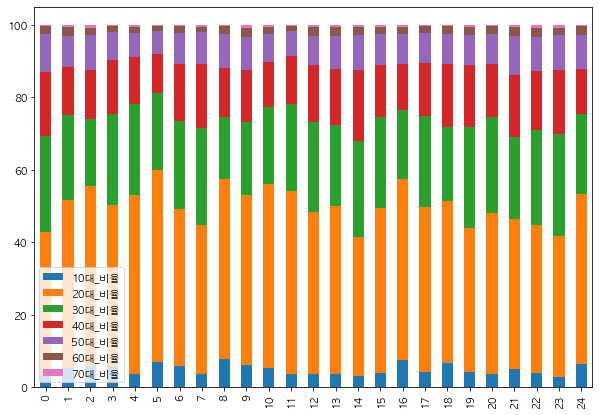

In [139]:
rental_area_age_ratio = rental_area_age[['district',
                                        '10대_비율','20대_비율','30대_비율','40대_비율','50대_비율','60대_비율','70대_비율']].copy()
rental_area_age_ratio.plot.bar(stacked=True, figsize=(10,7))

<AxesSubplot:>

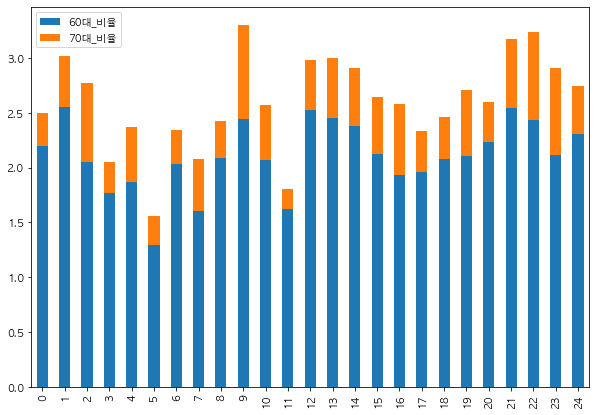

In [130]:
rental_area_age_ratio = rental_area_age[['district',
                                        '60대_비율','70대_비율']].copy()
rental_area_age_ratio.plot.bar(stacked=True, figsize=(10,7))

# 8. 구별 이용권 유형 비율 분석

In [88]:
# rental_area_code = pd.get_dummies(rental_area2["rental_code"])
# rental_area_code['district'] = rental_area2['district']
# rental_area_code = rental_area_code.groupby(rental_area_code['district']).sum()
# rental_area_code['일일권'] = rental_area_code['일일권']+rental_area_code['일일권(비회원)']
# rental_area_code = rental_area_code.drop('일일권(비회원)', axis=1)
# rental_area_code['총합'] = rental_area_code['단체권']+rental_area_code['일일권']+rental_area_code['정기권']
# rental_area_code['단체권_비율'] = rental_area_code['단체권']/rental_area_code['총합']*100
# rental_area_code['일일권_비율'] = rental_area_code['일일권']/rental_area_code['총합']*100
# rental_area_code['정기권_비율'] = rental_area_code['정기권']/rental_area_code['총합']*100

rental_area_code = rental_area_code.reset_index()
rental_area_code

,district,단체권,일일권,정기권,총합,단체권_비율,일일권_비율,정기권_비율
0,강남구,4599.0,118497.0,525530.0,648626.0,0.709037,18.268925,81.022037
1,강동구,3013.0,90848.0,425811.0,519672.0,0.579789,17.481796,81.938415
2,강북구,2199.0,46431.0,222702.0,271332.0,0.810446,17.112246,82.077308
3,강서구,5331.0,141758.0,695620.0,842709.0,0.632603,16.821702,82.545695
4,관악구,3964.0,90636.0,378118.0,472718.0,0.838555,19.173376,79.988069
5,광진구,6533.0,141544.0,608026.0,756103.0,0.864036,18.720201,80.415763
6,구로구,3918.0,92156.0,432120.0,528194.0,0.741773,17.447377,81.810850
7,금천구,1604.0,35900.0,189780.0,227284.0,0.705725,15.795217,83.499058
8,노원구,4404.0,119345.0,565471.0,689220.0,0.638983,17.315951,82.045065
9,도봉구,2051.0,44505.0,200746.0,247302.0,0.829350,17.996215,81.174434


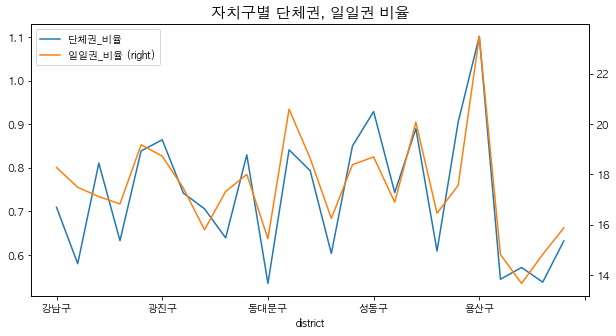

In [93]:
ax = rental_area_code.plot('district','단체권_비율', figsize=(10,5))
plt.title("자치구별 단체권, 일일권 비율", fontsize=15)
rental_area_code.plot('district','일일권_비율',secondary_y=True, ax=ax)
plt.show()

<AxesSubplot:>

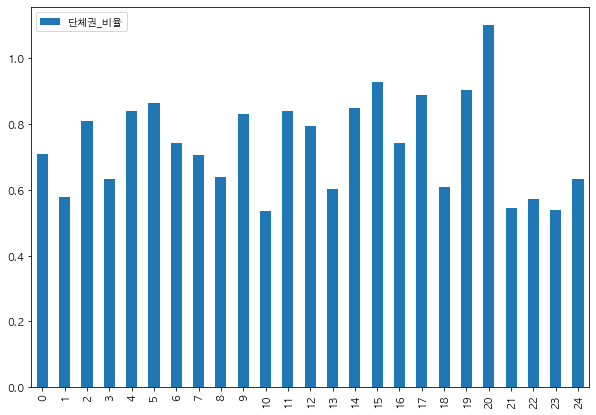

In [142]:
rental_area_code = rental_area_code[['district','단체권_비율']].copy()
rental_area_code.plot.bar(stacked=True, figsize=(10,7))